In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [48]:
df = pd.read_csv('london_merged_v2.csv')
df2 = pd.read_csv('london_merged_v1.csv')

In [49]:
df['weather_code_n'] = df2['weather_code']

In [52]:
df['weather_code_n']=df.weather_code_n.astype('int64')

In [55]:
df.columns

Index(['index', 'timestamp', 'date', 'year', 'month', 'day', 'day_name',
       'week_number', 'time', 'bike_number', 'temperature',
       'temperature_feels', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'weather_code_n'],
      dtype='object')

In [54]:
df = df.reindex(columns=column_names)

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weather_code_n
0,0,2015-01-04 00:00:00,15-01-04,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,3.0,3
1,1,2015-01-04 01:00:00,15-01-04,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,3.0,1
2,2,2015-01-04 02:00:00,15-01-04,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,3.0,1
3,3,2015-01-04 03:00:00,15-01-04,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3.0,1
4,4,2015-01-04 04:00:00,15-01-04,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,17-01-03,2017,Jan,3,Tuesday,1,19:00,1042,5.0,1.0,81.0,19.0,Broken clouds,0.0,0.0,3.0,3
17410,17410,2017-01-03 20:00:00,17-01-03,2017,Jan,3,Tuesday,1,20:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,3.0,4
17411,17411,2017-01-03 21:00:00,17-01-03,2017,Jan,3,Tuesday,1,21:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,3.0,4
17412,17412,2017-01-03 22:00:00,17-01-03,2017,Jan,3,Tuesday,1,22:00,224,5.5,1.5,76.0,23.0,Cloudy,0.0,0.0,3.0,4


In [ ]:
1 = Clear 
2 = few clouds 
3 = Broken clouds 
4 = Cloudy 
7 = Rain
10 = rain with thunderstorm 
26 = snowfall 
94 = Freezing Fog

In [ ]:
dct ={'Clear':1, 'mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              17414 non-null  int64  
 1   timestamp          17414 non-null  object 
 2   date               17414 non-null  object 
 3   year               17414 non-null  int64  
 4   month              17414 non-null  object 
 5   day                17414 non-null  int64  
 6   day_name           17414 non-null  object 
 7   week_number        17414 non-null  int64  
 8   time               17414 non-null  object 
 9   bike_number        17414 non-null  int64  
 10  temperature        17414 non-null  float64
 11  temperature_feels  17414 non-null  float64
 12  hum                17414 non-null  float64
 13  wind_speed         17414 non-null  float64
 14  weather_code       17414 non-null  object 
 15  is_holiday         17414 non-null  float64
 16  is_weekend         174

### Correlation

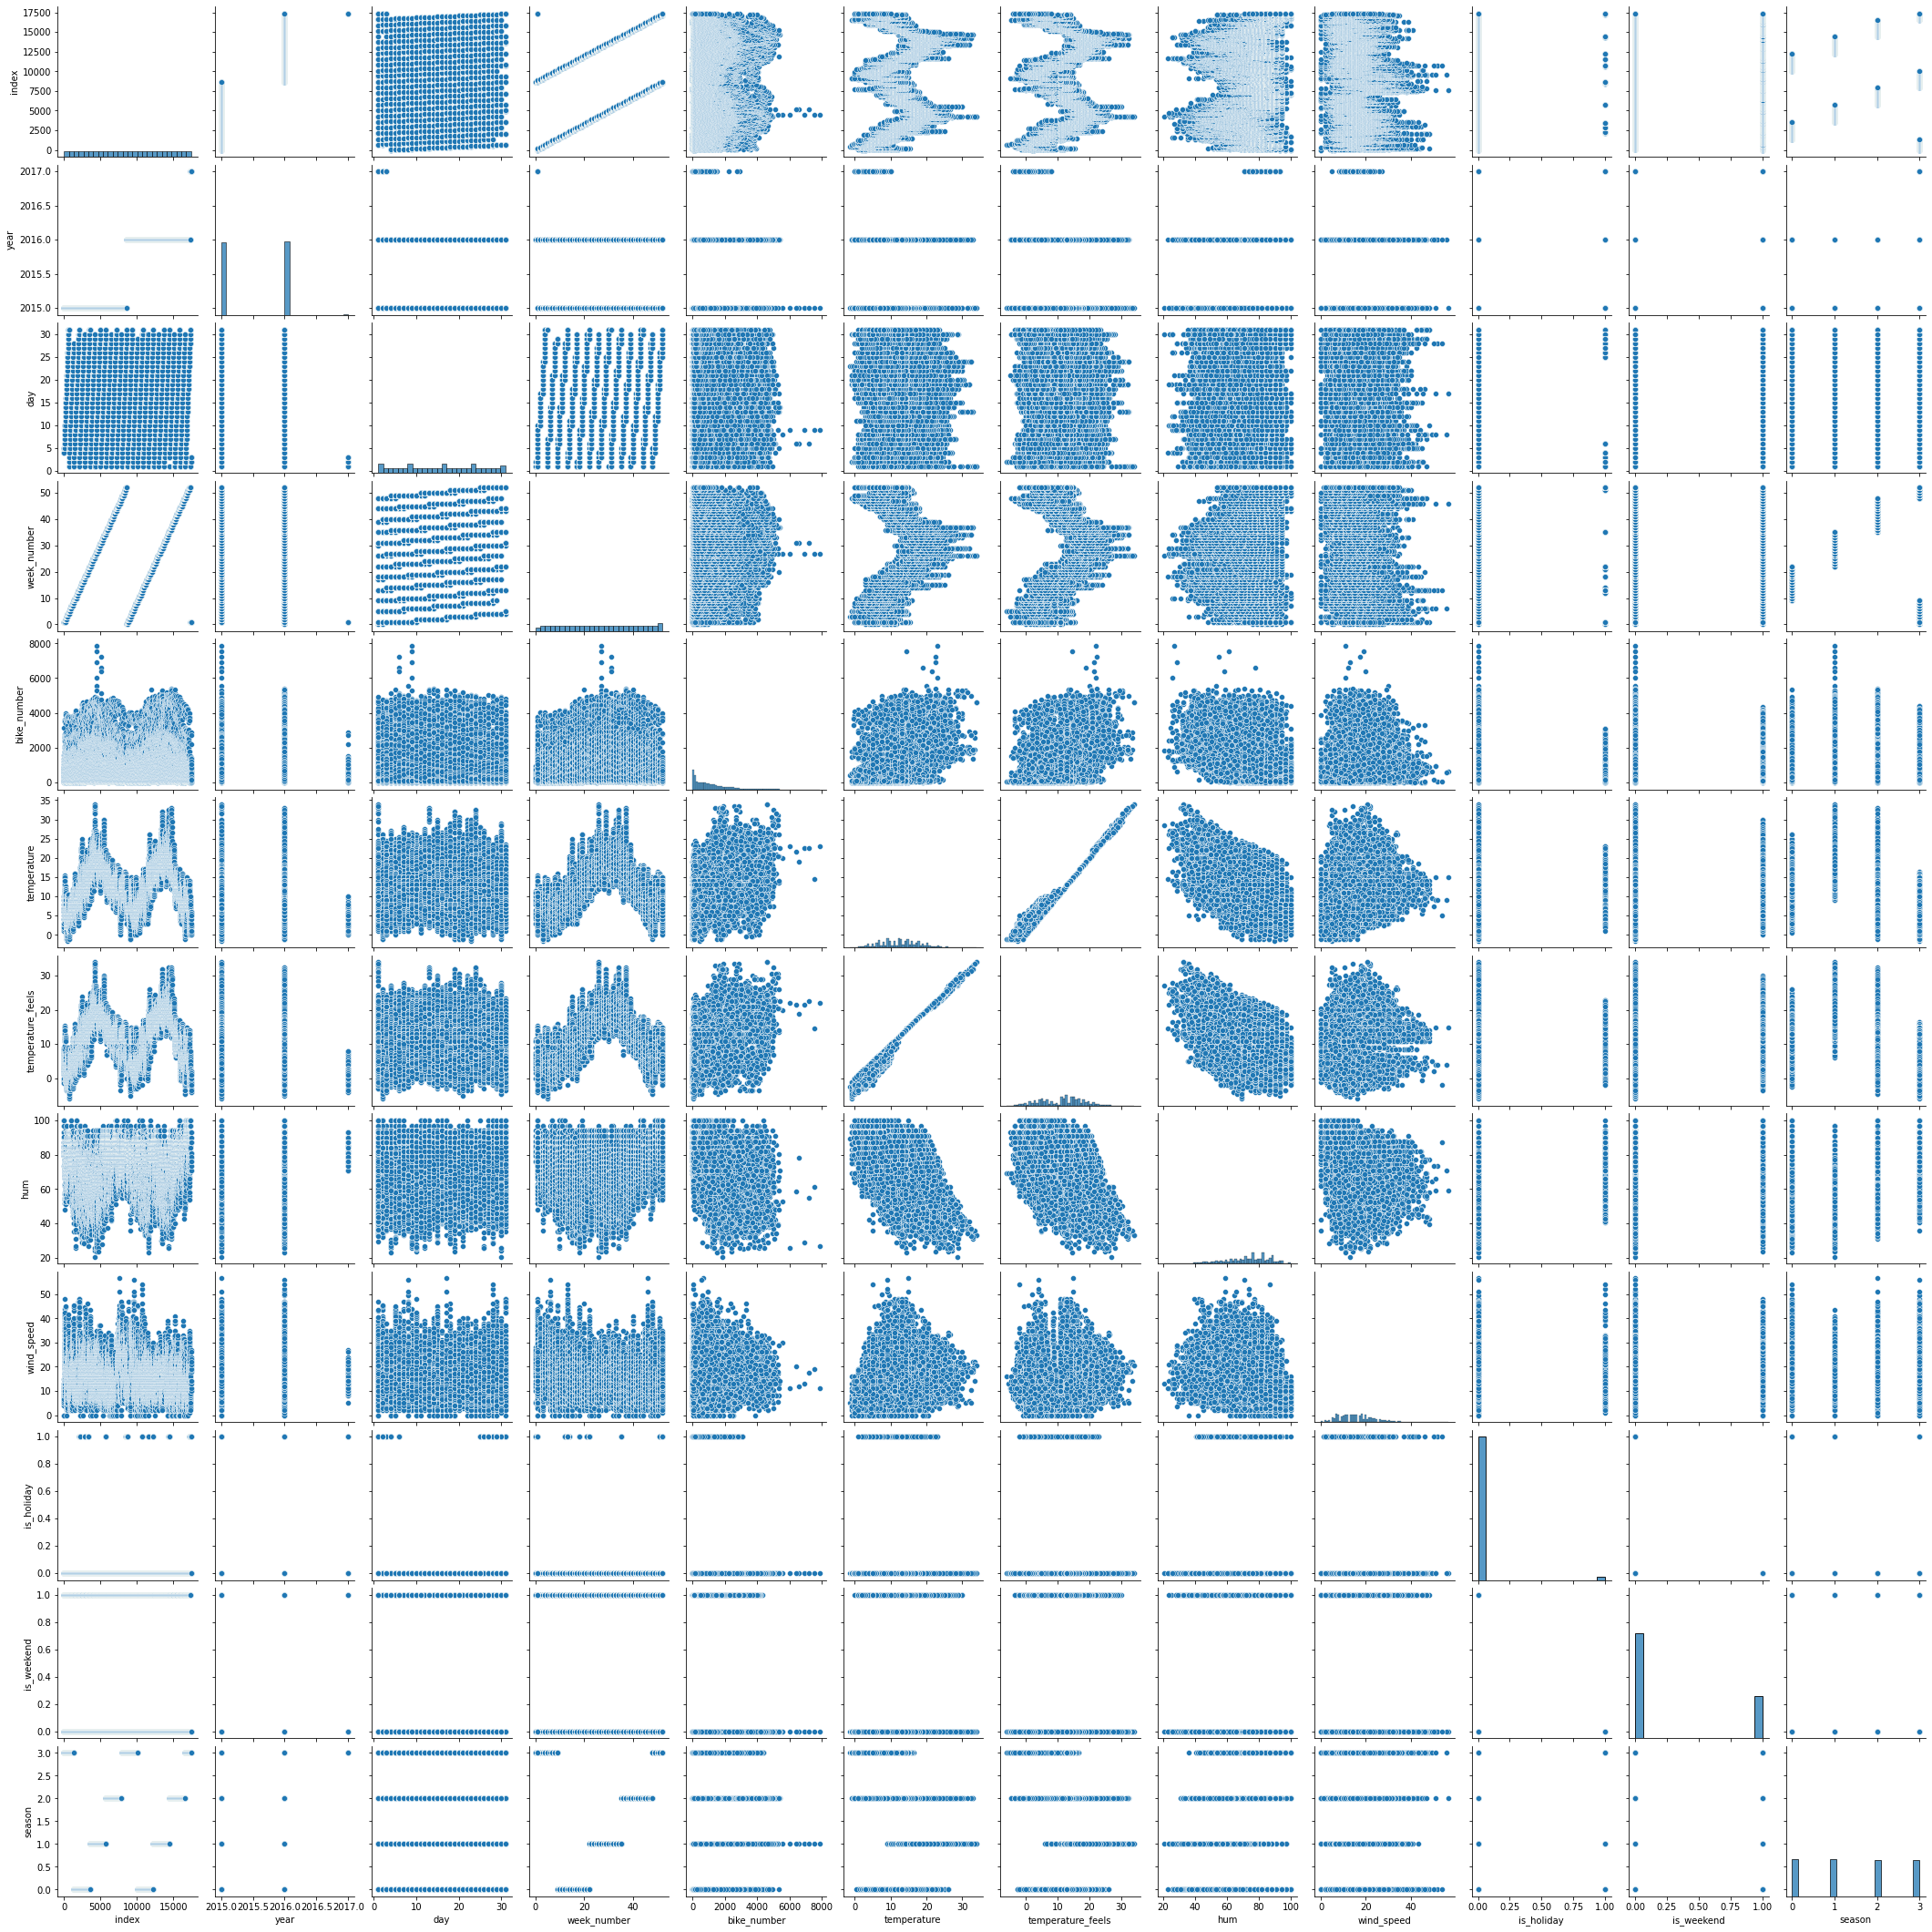

In [21]:
sns.pairplot(df)

<AxesSubplot:>

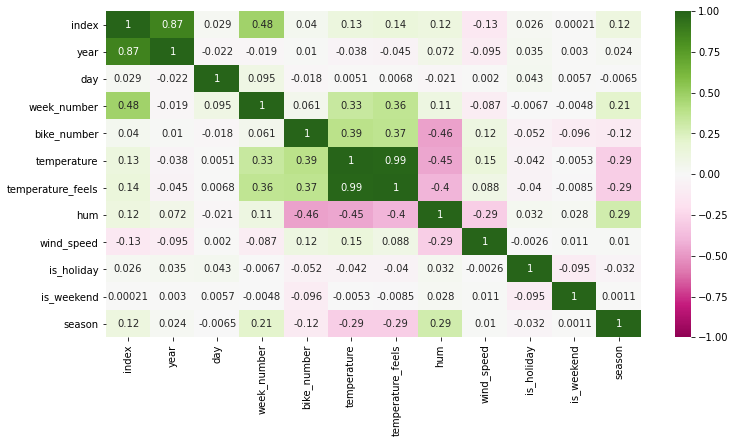

In [24]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='PiYG', vmin=-1, annot=True)

In [31]:
sns.heatmap(df.bike_number, df.day, normalize='columns', annot=True)

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: Inconsistent shape between the condition and the input (got (17414, 1) and (17414,))